In [ ]:

# !pip install tensorflow keras numpy pandas matplotlib

# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

# Check TensorFlow and Keras versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")


TensorFlow version: 2.17.1
Keras version: 3.5.0


**Uploading Dataset to Colab to Set Path**

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the dataset
print("Please upload your dataset ZIP file:")
uploaded = files.upload()

# Extract the ZIP file
dataset_zip = list(uploaded.keys())[0]  # Get the uploaded file name
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract to the "dataset" folder
print("Dataset extracted successfully!")

# Set dataset path
dataset_path = "dataset"
print(f"Dataset path: {os.path.abspath(dataset_path)}")


Please upload your dataset ZIP file:


Saving test.zip to test.zip
Dataset extracted successfully!
Dataset path: /content/dataset


**Confirm Dataset Structure**

In [ ]:
# Check the dataset structure
for root, dirs, files in os.walk(dataset_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files[:5]}")  # Display only the first 5 files in each folder
    print("-" * 50)


Root: dataset
Directories: ['waterapple', 'cucumber', 'galangal', 'soybeans', 'spinach', 'corn', 'bilimbi', 'banana', 'longbeans', 'sweetpotatoes', 'cantaloupe', 'papaya', 'guava', 'ginger', 'orange', 'kale', 'tobacco', 'shallot', 'pomelo', 'curcuma', 'paddy', 'cassava', 'melon', 'coconut', 'eggplant', 'aloevera', 'peperchili', 'mango', 'pineapple', 'watermelon']
Files: ['classname.txt']
--------------------------------------------------
Root: dataset/waterapple
Directories: []
Files: ['waterapple873.jpg', 'waterapple971.jpg', 'waterapple984.jpg', 'waterapple909.jpg', 'waterapple845.jpg']
--------------------------------------------------
Root: dataset/cucumber
Directories: []
Files: ['cucumber878.jpg', 'cucumber974.jpg', 'cucumber936.jpg', 'cucumber940.jpg', 'cucumber987.jpg']
--------------------------------------------------
Root: dataset/galangal
Directories: []
Files: ['galangal940.jpg', 'galangal979.jpg', 'galangal819.jpg', 'galangal911.jpg', 'galangal956.jpg']
------------------

**PLANT CLASSES **

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your extracted dataset
dataset_path = '/content/dataset'

# Get the class names (directories) and their counts, excluding non-directory files
class_names = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]
class_counts = [len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in class_names]

# Create a bar plot for class distribution
plt.figure(figsize=(12, 8))
plt.barh(class_names, class_counts)
plt.xlabel('Number of Images')
plt.ylabel('Plant Classes')
plt.title('Class Distribution of Plant Dataset')
plt.show()

# Checking min, max and mean class counts
min_count = min(class_counts)
max_count = max(class_counts)
mean_count = sum(class_counts) / len(class_counts)

print(f"Minimum class count: {min_count}")
print(f"Maximum class count: {max_count}")
print(f"Average class count: {mean_count}")


**Resize Images & Normalize **

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# Select a sample image from the dataset (change the path if needed)
sample_class = os.listdir(dataset_path)[0]  # Pick the first class folder
sample_image_path = os.path.join(dataset_path, sample_class, os.listdir(os.path.join(dataset_path, sample_class))[0])

# Load the original image
original_image = cv2.imread(sample_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB for matplotlib

# Resize the image to 224x224
resized_image = cv2.resize(original_image, (224, 224))

# Plot both images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image (224x224)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Normalize pixel values using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values to [0, 1]

# Load a batch of images
generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resized images
    batch_size=5,  # Load a small batch for visualization
    class_mode='categorical',
    shuffle=False  # Keep the order for debugging
)

# Get a batch of normalized images and their labels
normalized_images, labels = next(generator)

# Plot normalized images to verify
import matplotlib.pyplot as plt

for i in range(len(normalized_images)):
    plt.imshow(normalized_images[i])  # Show image
    plt.title(f"Normalized (Class: {list(generator.class_indices.keys())[np.argmax(labels[i])]})")
    plt.axis('off')
    plt.show()

# Print normalized pixel values range for confirmation
print(f"Pixel value range after normalization: Min={normalized_images.min()}, Max={normalized_images.max()}")


**Splitting the Dataset**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
img_size = (224, 224)
batch_size = 32

# Define ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.15  # Reserve 15% for validation
)

# Training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # 85% of data
    shuffle=True
)

# Validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # 15% of data
    shuffle=True
)

# Define ImageDataGenerator for testing (no validation split needed)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order for proper evaluation
)

# Print the number of samples in each set
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")
print(f"Number of testing samples: {test_generator.samples}")


**Data Augmentation**

In [ ]:
# Define ImageDataGenerator with data augmentation for training
augmented_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True  # Flip images horizontally
)

# Create augmented training data generator
augmented_train_generator = augmented_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training subset
    shuffle=True
)

# Visualize a batch of augmented images
import matplotlib.pyplot as plt

# Fetch a batch of augmented images
augmented_images, augmented_labels = next(augmented_train_generator)

# Plot the first 5 augmented images
for i in range(5):
    plt.imshow(augmented_images[i])
    plt.title(f"Augmented (Class: {list(augmented_train_generator.class_indices.keys())[np.argmax(augmented_labels[i])]})")
    plt.axis('off')
    plt.show()


**Model Development**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Path to the dataset
dataset_path = '/content/dataset'

# Define the ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load the training and validation data with ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 'training' subset
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset
)

# Define the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten layer
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(30, activation='softmax')  # Output layer for 30 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Found 4800 images belonging to 30 classes.
Found 1200 images belonging to 30 classes.
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.0531 - loss: 3.4785 - val_accuracy: 0.1360 - val_loss: 3.0219
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 2.9581
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.1323 - loss: 2.9269 - val_accuracy: 0.1926 - val_loss: 2.7251
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 2.7572
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 683s 4s/step - accuracy: 0.2079 - loss: 2.6189 - val_accuracy: 0.2796 - val_loss: 2.4384
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.4501
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 682s 4s/step - accuracy: 0.2381 - loss: 2.5146 - val_accuracy: 0.2728 - val_

**Training the Model**

In [ ]:
model.save('plant_classification_model.keras')


**Model Evaluation**

  2/188 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6641 - loss: 1.0712 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.7999 - loss: 0.7899
Test Accuracy: 80.53%
Test Loss: 0.7339
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step

Classification Report:
               precision    recall  f1-score   support

     aloevera       0.74      0.83      0.78       200
       banana       0.86      0.63      0.73       200
      bilimbi       0.81      0.86      0.83       200
   cantaloupe       0.49      0.80      0.61       200
      cassava       0.79      0.92      0.85       200
      coconut       0.91      0.94      0.92       200
         corn       0.68      0.77      0.72       200
     cucumber       0.78      0.86      0.82       200
      curcuma       0.93      0.78      0.84       200
     eggplant       0.97      0.90      0.93       200
     galangal       0.85      0.79      0.82       200
       ginger       0.90      0.79      0.84       200
        guava       0.88      0.90      0.89       200
         kale       0.78      0.89      0.83 

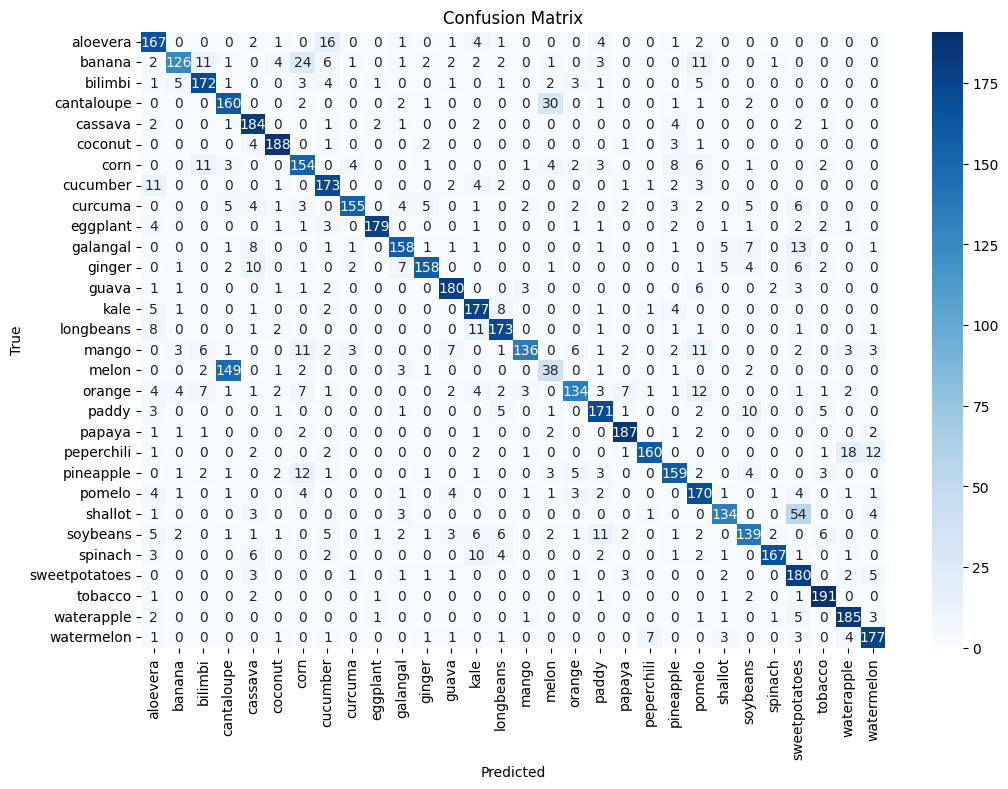

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


** Focused Data Augmentation**

Objective:

Improve diversity for underperforming classes (melon and cantaloupe).

Enhance overall model generalization with additional augmentation techniques. **bold text**

In [ ]:
melon_dir = os.path.join(dataset_path, 'melon')
print(f"Melon Directory Path: {melon_dir}")
print(f"Files in Melon Directory: {os.listdir(melon_dir)}")


Melon Directory Path: /content/dataset/melon
Files in Melon Directory: ['melon919.jpg', 'melon896.jpg', 'melon966.jpg', 'melon971.jpg', 'melon995.jpg', 'melon863.jpg', 'melon977.jpg', 'melon981.jpg', 'melon996.jpg', 'melon923.jpg', 'melon825.jpg', 'melon931.jpg', 'melon988.jpg', 'melon812.jpg', 'melon968.jpg', 'melon907.jpg', 'melon844.jpg', 'melon918.jpg', 'melon972.jpg', 'melon944.jpg', 'melon824.jpg', 'melon889.jpg', 'melon875.jpg', 'melon809.jpg', 'melon998.jpg', 'melon990.jpg', 'melon830.jpg', 'melon814.jpg', 'melon924.jpg', 'melon848.jpg', 'melon985.jpg', 'melon831.jpg', 'melon802.jpg', 'melon870.jpg', 'melon939.jpg', 'melon964.jpg', 'melon861.jpg', 'melon841.jpg', 'melon902.jpg', 'melon817.jpg', 'melon958.jpg', 'melon948.jpg', 'melon892.jpg', 'melon879.jpg', 'melon867.jpg', 'melon920.jpg', 'melon872.jpg', 'melon828.jpg', 'melon877.jpg', 'melon887.jpg', 'melon917.jpg', 'melon989.jpg', 'melon926.jpg', 'melon901.jpg', 'melon821.jpg', 'melon883.jpg', 'melon869.jpg', 'melon928.jpg', 

Number of Melon Images Found: 200


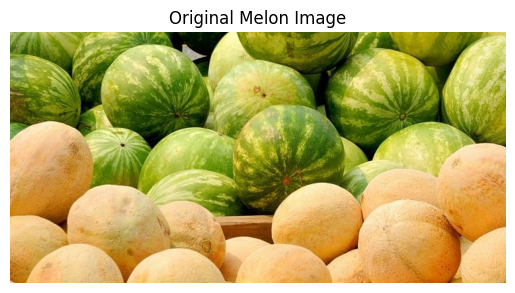

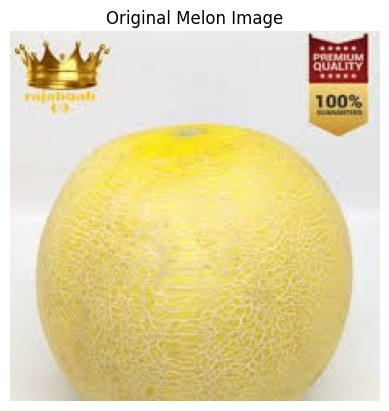

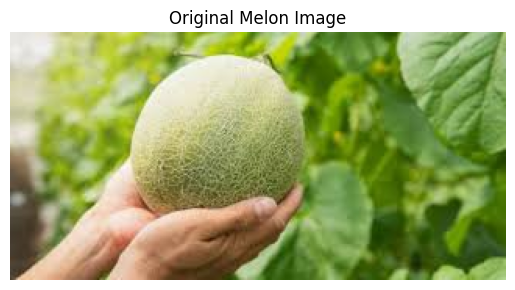

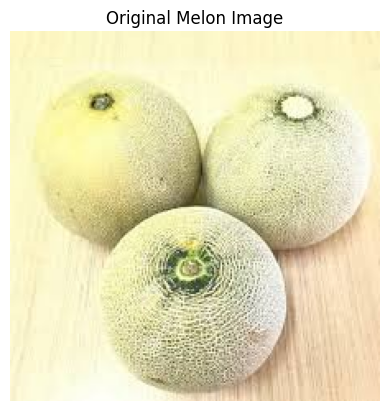

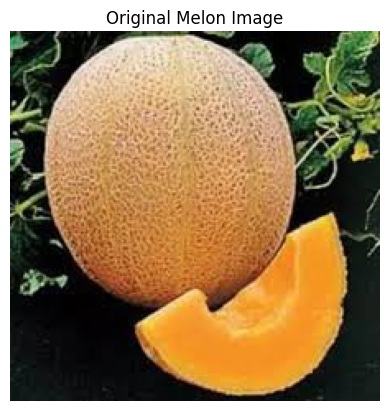

In [ ]:
import glob

# Use glob to load images for the 'melon' class
melon_images = glob.glob(os.path.join(dataset_path, 'melon', '*.jpg'))

print(f"Number of Melon Images Found: {len(melon_images)}")

if len(melon_images) > 0:
    # Preview the first few images
    for img_path in melon_images[:5]:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title("Original Melon Image")
        plt.axis('off')
        plt.show()
else:
    print("No melon images found. Please check the dataset structure.")


Found 200 images belonging to 1 classes.


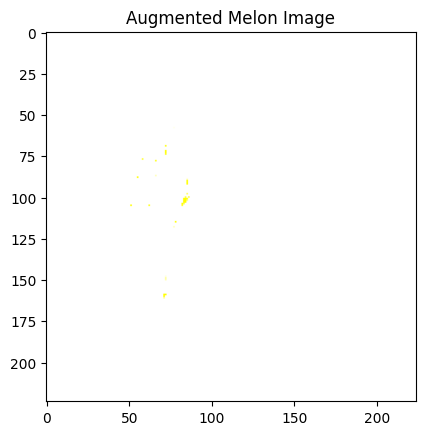

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the focused augmentation for 'melon' class
focused_augmentation = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Now load the data with augmentation
melon_generator = focused_augmentation.flow_from_directory(
    dataset_path,  # Correct path
    classes=['melon'],  # Focus specifically on the 'melon' class
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Display the first augmented image from the 'melon' class
import matplotlib.pyplot as plt
image, label = next(melon_generator)
plt.imshow(image[0])
plt.title('Augmented Melon Image')
plt.show()


Found 200 images belonging to 1 classes.


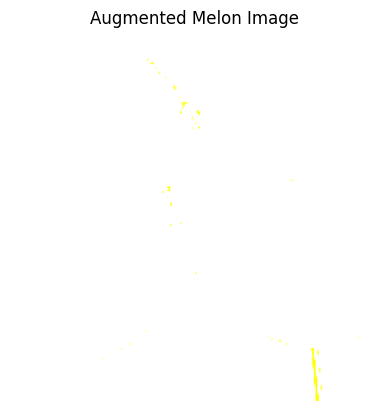

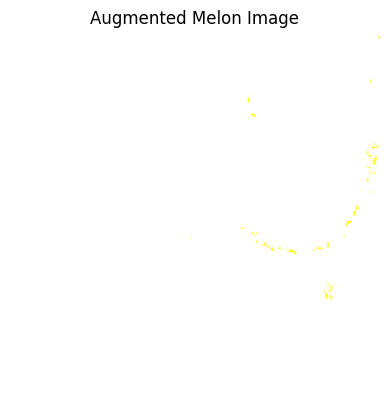

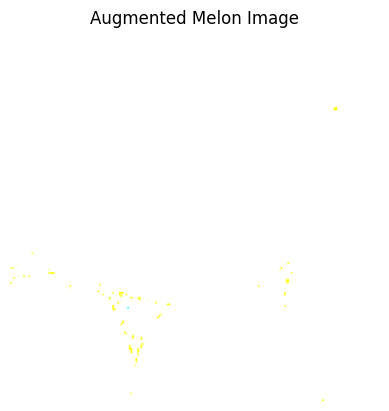

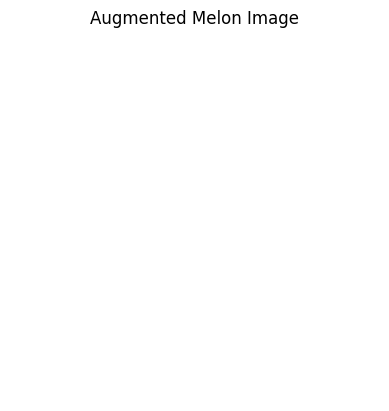

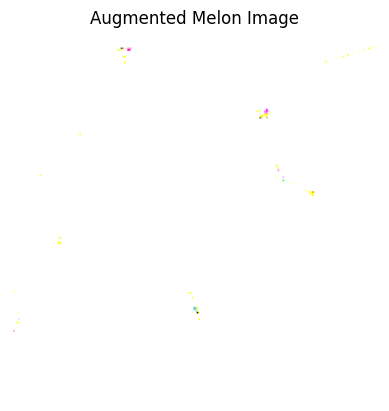

In [ ]:
# Generate augmented images for the 'melon' class
melon_generator = focused_augmentation.flow_from_directory(
    dataset_path,  # Base dataset path
    classes=['melon'],  # Only focus on the 'melon' class
    target_size=(224, 224),
    batch_size=5,
    class_mode=None  # No labels needed for augmentation preview
)

# Visualize the augmented images
import matplotlib.pyplot as plt

for i in range(5):  # Display 5 augmented images
    augmented_batch = next(melon_generator)  # Get a batch of augmented images
    plt.imshow(augmented_batch[0])  # Display the first image in the batch
    plt.title("Augmented Melon Image")
    plt.axis('off')
    plt.show()


In [ ]:
# Retrain the model with the same architecture
history_finetuned = model.fit(
    train_generator,  # Use updated training generator with augmented data
    epochs=10,  # Train for a few more epochs
    validation_data=val_generator,  # Use the same validation generator
    verbose=1
)

# Save the fine-tuned model
model.save('fine_tuned_plant_model.keras')
print("Fine-tuned model saved as 'fine_tuned_plant_model.keras'")


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.6956 - loss: 0.9465 - val_accuracy: 0.5778 - val_loss: 1.6215
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.7277 - loss: 0.8284 - val_accuracy: 0.5822 - val_loss: 1.5494
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.7660 - loss: 0.6858 - val_accuracy: 0.5678 - val_loss: 1.7977
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.7896 - loss: 0.5926 - val_accuracy: 0.5911 - val_loss: 1.6651
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.8259 - loss: 0.4958 - val_accuracy: 0.5867 - val_loss: 1.7014
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8380 - loss: 0.4445 - val_accuracy: 0.5889 - val_loss: 1.9396
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.8392 - loss: 0.4458 - val_accuracy: 0.5767 - val_loss: 1.8983
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.8587 - loss: 0

In [ ]:
# Evaluate the fine-tuned model on the test set
fine_tuned_test_loss, fine_tuned_test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Fine-Tuned Test Accuracy: {fine_tuned_test_accuracy*100:.2f}%")
print(f"Fine-Tuned Test Loss: {fine_tuned_test_loss:.4f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.9193 - loss: 0.3615
Fine-Tuned Test Accuracy: 90.98%
Fine-Tuned Test Loss: 0.3697


188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step

Classification Report:
               precision    recall  f1-score   support

     aloevera       0.91      0.95      0.93       200
       banana       0.92      0.93      0.92       200
      bilimbi       0.98      0.98      0.98       200
   cantaloupe       0.50      0.91      0.64       200
      cassava       0.91      0.94      0.92       200
      coconut       0.96      0.95      0.95       200
         corn       0.90      0.92      0.91       200
     cucumber       0.91      0.94      0.93       200
      curcuma       0.94      0.95      0.94       200
     eggplant       0.96      0.95      0.96       200
     galangal       0.96      0.94      0.95       200
       ginger       0.97      0.90      0.93       200
        guava       0.99      0.94      0.96       200
         kale       0.96      0.93      0.95       200
    longbeans       0.93      0.97      0.95       200
        mango       0.93      0.91      0.92       2

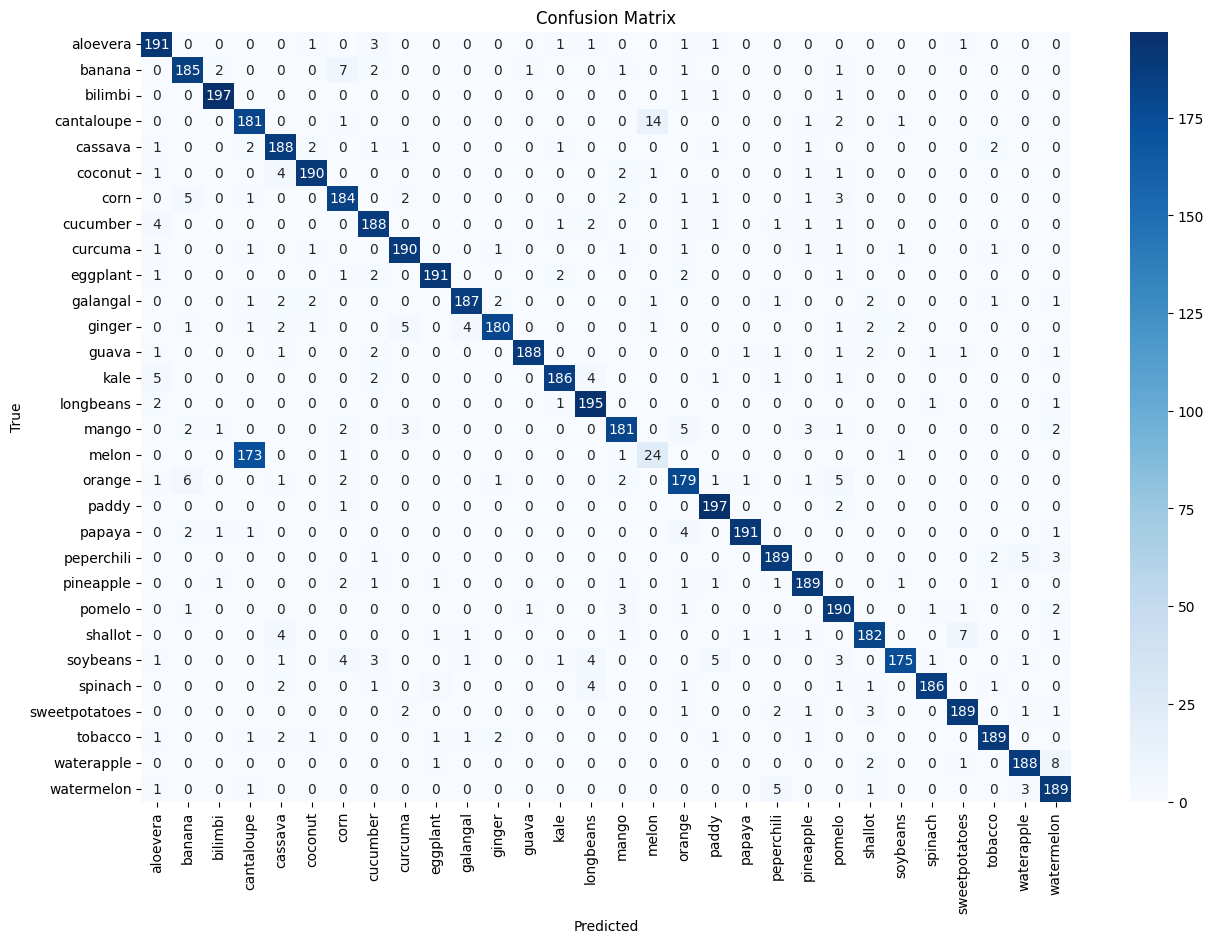

In [ ]:
# Predict
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Key Issues with Cantaloupe Classification**

**Misclassification Count:**

A large portion of cantaloupe samples is misclassified, primarily as:
Melon (most common confusion).

Other similar fruit classes like orange and papaya.

**Possible Reasons:**


**Visual Similarity:**
Cantaloupe and melon likely have similar features (e.g., color, texture) that make them difficult for the model to differentiate.


**Focused Augmentation for Cantaloupe**

Found 200 images belonging to 1 classes.


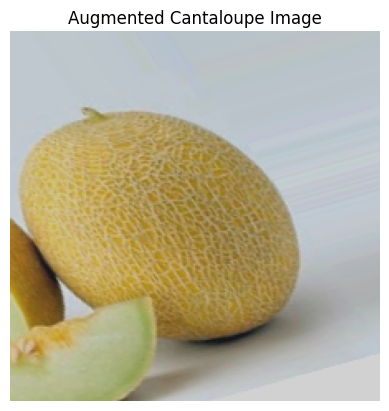

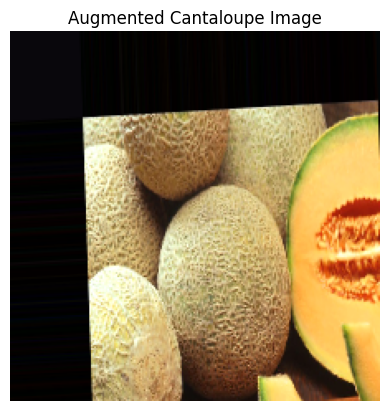

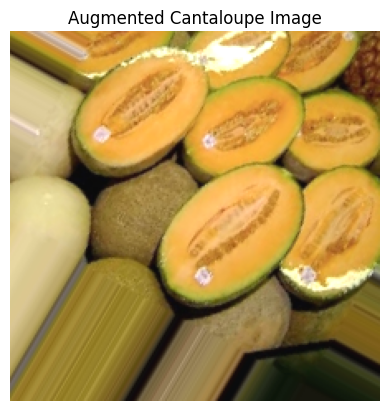

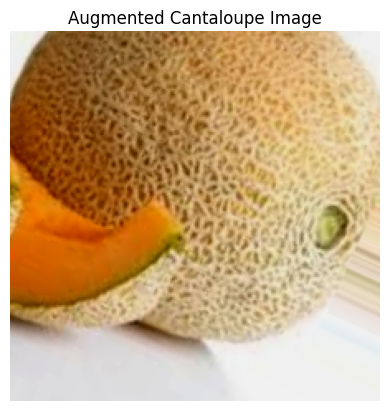

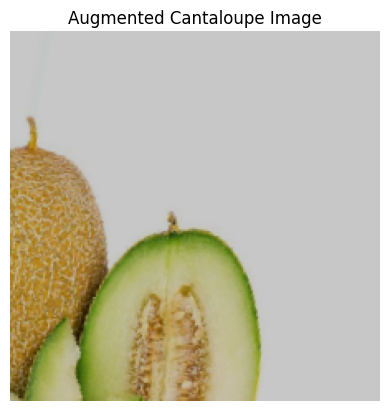

In [ ]:
cantaloupe_dir = os.path.join(dataset_path, 'cantaloupe')

cantaloupe_augmentation = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    channel_shift_range=50  # Adjust color channels
)

# Generate augmented images for cantaloupe
cantaloupe_generator = cantaloupe_augmentation.flow_from_directory(
    dataset_path,
    classes=['cantaloupe'],  # Focus on cantaloupe class
    target_size=(224, 224),
    batch_size=5,
    class_mode=None
)

# Visualize augmented cantaloupe images
for i in range(5):
    augmented_batch = next(cantaloupe_generator)
    plt.imshow(augmented_batch[0])
    plt.title("Augmented Cantaloupe Image")
    plt.axis('off')
    plt.show()


In [ ]:
# Retrain the model with the same architecture
history_augmented = model.fit(
    train_generator,  # Training generator includes the augmented data
    epochs=10,  # Train for 10 additional epochs
    validation_data=val_generator,  # Use the same validation generator
    verbose=1
)

# Save the re-trained model
model.save('augmented_fine_tuned_model.keras')
print("Model saved as 'augmented_fine_tuned_model.keras'")


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.8864 - loss: 0.2833 - val_accuracy: 0.5922 - val_loss: 2.0831
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.8863 - loss: 0.2799 - val_accuracy: 0.5889 - val_loss: 2.1026
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.8982 - loss: 0.2696 - val_accuracy: 0.5844 - val_loss: 2.0043
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.9053 - loss: 0.2555 - val_accuracy: 0.5789 - val_loss: 2.2212
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.8867 - loss: 0.2874 - val_accuracy: 0.5978 - val_loss: 2.2215
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9024 - loss: 0.2538 - val_accuracy: 0.5967 - val_loss: 2.2582
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.9029 - loss: 0.2414 - val_accuracy: 0.6000 - val_loss: 2.2576
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.9070 - loss: 0

In [ ]:
# Evaluate the fine-tuned model on the test set
augmented_test_loss, augmented_test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Augmented Test Accuracy: {augmented_test_accuracy*100:.2f}%")
print(f"Augmented Test Loss: {augmented_test_loss:.4f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9224 - loss: 0.3841
Augmented Test Accuracy: 91.02%
Augmented Test Loss: 0.3888


188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step

Classification Report:
               precision    recall  f1-score   support

     aloevera       0.92      0.94      0.93       200
       banana       0.91      0.93      0.92       200
      bilimbi       0.97      0.98      0.98       200
   cantaloupe       0.49      0.97      0.65       200
      cassava       0.93      0.95      0.94       200
      coconut       0.95      0.95      0.95       200
         corn       0.89      0.94      0.91       200
     cucumber       0.86      0.94      0.90       200
      curcuma       0.94      0.93      0.93       200
     eggplant       0.94      0.95      0.95       200
     galangal       0.97      0.94      0.95       200
       ginger       0.93      0.93      0.93       200
        guava       0.97      0.94      0.95       200
         kale       0.96      0.92      0.94       200
    longbeans       0.92      0.98      0.95       200
        mango       0.94      0.91      0.93       2

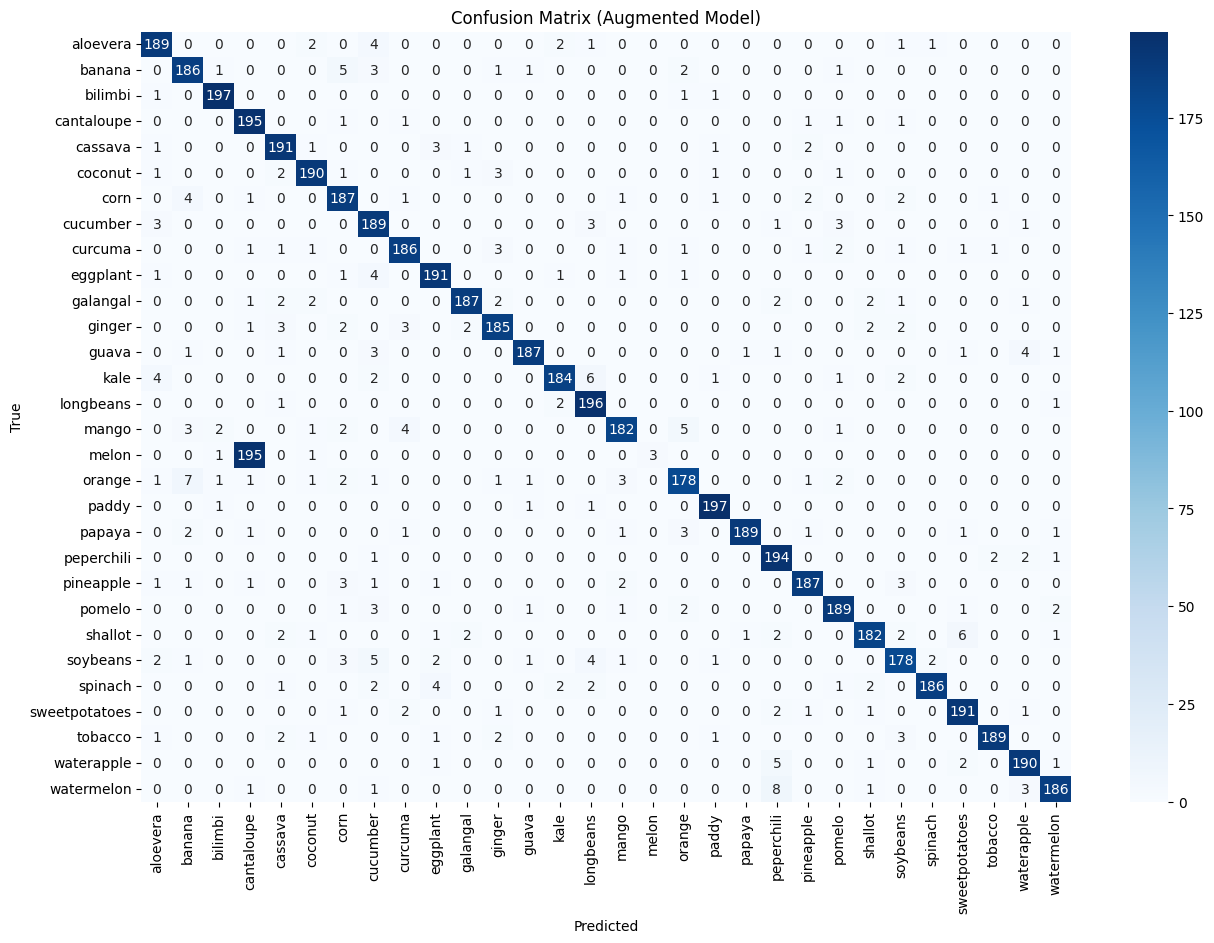

In [ ]:
# Predict on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Augmented Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 with pre-trained weights from ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces the dimensions of the feature maps
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dense(30, activation='softmax')(x)  # Output layer for 30 plant classes

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Corrected learning rate argument
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model structure
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,716,638 (98.10 MB)

 Trainable params: 2,128,926 (8.12 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Start with 10 epochs
    validation_data=val_generator,
    verbose=1
)

# Save the trained model
model.save('resnet50_plant_model.h5')
print("Model saved as 'resnet50_plant_model.h5'")


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.0474 - loss: 3.4346 - val_accuracy: 0.0556 - val_loss: 3.3437
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.0815 - loss: 3.2813 - val_accuracy: 0.0622 - val_loss: 3.2837
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.1066 - loss: 3.2068 - val_accuracy: 0.0767 - val_loss: 3.2517
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.1200 - loss: 3.1576 - val_accuracy: 0.0900 - val_loss: 3.2199
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.1460 - loss: 3.1039 - val_accuracy: 0.1067 - val_loss: 3.2047
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.1468 - loss: 3.0804 - val_accuracy: 0.1178 - val_loss: 3.1646
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.1778 - loss: 3.0242 - val_accuracy: 0.1156 - val_loss: 3.1516
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.1679 - loss: 3

Model saved as 'resnet50_plant_model.h5'


In [ ]:
model.save('resnet50_plant_model.keras')


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.2155 - loss: 2.9414
Test Accuracy: 20.32%
Test Loss: 2.9497


**Steps to Improve Performance**

In [ ]:
# Unfreeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = True

# Compile the model again with a smaller learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Retrain the model
history_fine_tune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

# Save the fine-tuned model
model.save('resnet50_fine_tuned.keras')


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 141s 508ms/step - accuracy: 0.0905 - loss: 10.9181 - val_accuracy: 0.0356 - val_loss: 7.5556
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 50s 307ms/step - accuracy: 0.4943 - loss: 1.9743 - val_accuracy: 0.0600 - val_loss: 7.0247
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 301ms/step - accuracy: 0.7527 - loss: 0.8800 - val_accuracy: 0.0911 - val_loss: 5.5475
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 301ms/step - accuracy: 0.8349 - loss: 0.5662 - val_accuracy: 0.2133 - val_loss: 3.6794
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.8949 - loss: 0.3661 - val_accuracy: 0.5422 - val_loss: 1.8341
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 301ms/step - accuracy: 0.9263 - loss: 0.2622 - val_accuracy: 0.7567 - val_loss: 0.8558
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - accuracy: 0.9467 - loss: 0.1863 - val_accuracy: 0.8211 - val_loss: 0.6034
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 300ms/step - accuracy: 0.9510 - loss:

188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step


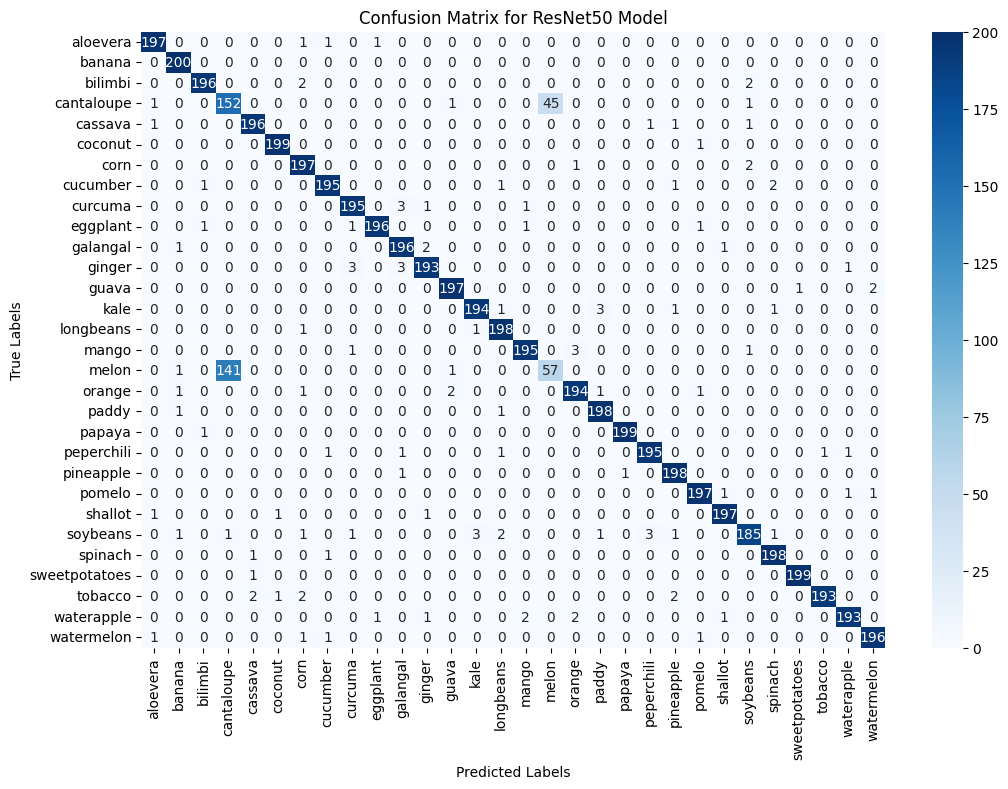

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
test_predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
test_predictions = np.argmax(test_predictions, axis=-1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ResNet50 Model')
plt.show()


In [ ]:
Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


" Plot training & validation accuracy values\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('ResNet50 Model Accuracy')\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\nplt.legend(['Train', 'Val'], loc='upper left')\nplt.show()\n\n# Plot training & validation loss values\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('ResNet50 Model Loss')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend(['Train', 'Val'], loc='upper left')\nplt.show()"

In [ ]:
from sklearn.metrics import classification_report

# Get precision, recall, and F1-score for each class
report = classification_report(true_labels, test_predictions, target_names=test_generator.class_indices.keys())
print(report)


               precision    recall  f1-score   support

     aloevera       0.99      0.98      0.99       200
       banana       0.96      1.00      0.98       200
      bilimbi       0.98      0.98      0.98       200
   cantaloupe       0.51      0.31      0.39       200
      cassava       0.98      0.98      0.98       200
      coconut       0.98      0.99      0.99       200
         corn       0.98      0.98      0.98       200
     cucumber       0.99      0.98      0.99       200
      curcuma       0.95      0.97      0.96       200
     eggplant       0.97      0.97      0.97       200
     galangal       0.98      0.98      0.98       200
       ginger       0.98      0.96      0.97       200
        guava       0.98      0.98      0.98       200
         kale       0.98      0.97      0.98       200
    longbeans       0.99      0.99      0.99       200
        mango       0.98      0.96      0.97       200
        melon       0.51      0.70      0.59       200
       or

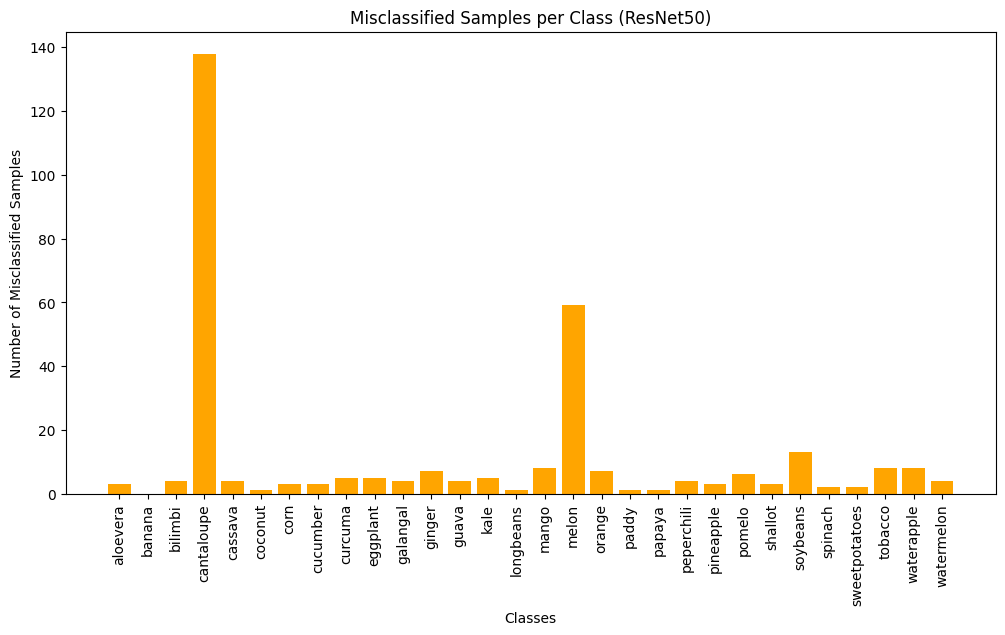

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the misclassified labels for each class
misclassified_labels = []

for i in range(len(true_labels)):
    if true_labels[i] != test_predictions[i]:
        misclassified_labels.append(true_labels[i])  # Append the true class of the misclassified image

# Count misclassified samples for each class
misclassified_count = Counter(misclassified_labels)

# Sort the misclassified counts by class name for a better visualization
misclassified_count_sorted = dict(sorted(misclassified_count.items()))

# Get the class names (sorted for consistency)
class_names = list(test_generator.class_indices.keys())
misclassified_values = [misclassified_count_sorted.get(i, 0) for i in range(len(class_names))]

# Plot the bar graph for misclassified samples per class
plt.figure(figsize=(12, 6))
plt.bar(class_names, misclassified_values, color='orange')
plt.xlabel('Classes')
plt.ylabel('Number of Misclassified Samples')
plt.title('Misclassified Samples per Class (ResNet50)')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.show()


            Class  Accuracy
1          banana     1.000
5         coconut     0.995
18          paddy     0.995
19         papaya     0.995
14      longbeans     0.995
25        spinach     0.990
26  sweetpotatoes     0.990
0        aloevera     0.985
23        shallot     0.985
21      pineapple     0.985
7        cucumber     0.985
6            corn     0.985
12          guava     0.980
2         bilimbi     0.980
29     watermelon     0.980
10       galangal     0.980
4         cassava     0.980
20     peperchili     0.980
9        eggplant     0.975
13           kale     0.975
8         curcuma     0.975
22         pomelo     0.970
17         orange     0.965
11         ginger     0.965
28     waterapple     0.960
15          mango     0.960
27        tobacco     0.960
24       soybeans     0.935
16          melon     0.705
3      cantaloupe     0.310


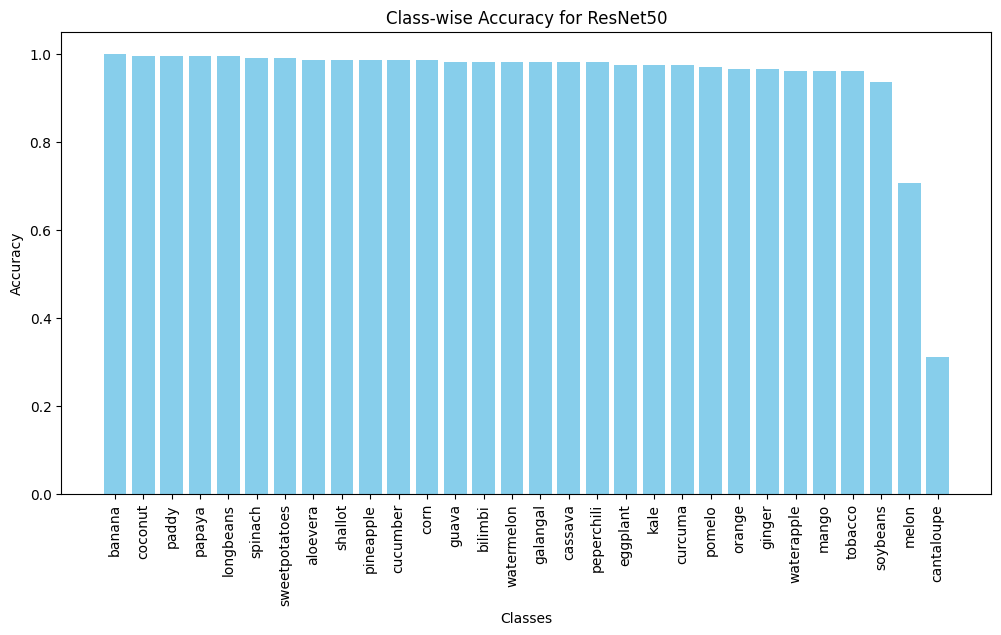

In [ ]:
# Convert class names to a list
class_names = list(test_generator.class_indices.keys())

# Calculate class-wise accuracy
class_accuracy = {}
for i in range(len(class_names)):
    correct_preds = np.sum((true_labels == i) & (test_predictions == i))
    total_class_samples = np.sum(true_labels == i)
    class_accuracy[class_names[i]] = correct_preds / total_class_samples

# Create a DataFrame for class-wise accuracy
import pandas as pd
class_accuracy_df = pd.DataFrame(list(class_accuracy.items()), columns=['Class', 'Accuracy'])

# Sort the DataFrame by accuracy
class_accuracy_df = class_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Print class-wise accuracy
print(class_accuracy_df)

import matplotlib.pyplot as plt
import pandas as pd

# Convert class names to a list
class_names = list(test_generator.class_indices.keys())

# Calculate class-wise accuracy
class_accuracy = {}
for i in range(len(class_names)):
    correct_preds = np.sum((true_labels == i) & (test_predictions == i))
    total_class_samples = np.sum(true_labels == i)
    class_accuracy[class_names[i]] = correct_preds / total_class_samples

# Create a DataFrame for class-wise accuracy
class_accuracy_df = pd.DataFrame(list(class_accuracy.items()), columns=['Class', 'Accuracy'])

# Sort the DataFrame by accuracy
class_accuracy_df = class_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plotting class-wise accuracy as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_accuracy_df['Class'], class_accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy for ResNet50')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


** Loading InceptionV3**

In [ ]:
import os

dataset_path = '/content/dataset'
print("Dataset directory structure:")
print(os.listdir(dataset_path))


Dataset directory structure:
['melon', 'spinach', 'banana', 'pineapple', 'corn', 'guava', 'watermelon', 'tobacco', 'curcuma', 'pomelo', 'coconut', 'paddy', 'papaya', 'waterapple', 'orange', 'kale', 'cantaloupe', 'shallot', 'sweetpotatoes', 'bilimbi', 'galangal', 'longbeans', 'cassava', 'classname.txt', 'aloevera', 'mango', 'cucumber', 'peperchili', 'soybeans', 'eggplant', 'ginger']


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the path to your dataset
dataset_path = '/content/dataset'

# Load pre-trained InceptionV3 model without the top layer (include_top=False)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent them from being trained
base_model.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(30, activation='softmax')  # Assuming you have 30 classes
])

# Correct optimizer with learning_rate instead of lr
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow images from the dataset folder (train and validation)
train_generator = train_datagen.flow_from_directory(
    dataset_path,  # Directly use the root folder with class subfolders
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# You can also split the dataset for validation if necessary or use a separate validation folder
# val_generator = val_datagen.flow_from_directory(
#     '/content/dataset/val',  # If you have a separate validation folder
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    # validation_data=val_generator,  # Uncomment if using a validation set
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 6000 images belonging to 30 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 108s 460ms/step - accuracy: 0.4077 - loss: 2.2768
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7500 - loss: 0.7778
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.7736 - loss: 0.8103
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.7188 - loss: 0.7283
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 419ms/step - accuracy: 0.8167 - loss: 0.6092
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 96us/step - accuracy: 0.8750 - loss: 0.5582 
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 79s 409ms/step - accuracy: 0.8451 - loss: 0.5064
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 98us/step - accuracy: 0.9062 - loss: 0.2386 
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 424ms/step - accuracy: 0.8624 - loss: 0.4407
Epoch 10/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.8750 - loss: 0.4061 


In [ ]:
# Assuming you already have the 'history' object after training

# Final Training Accuracy and Loss
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final Training Loss: {final_train_loss:.4f}")



Final Training Accuracy: 87.50%
Final Training Loss: 0.4061


188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step


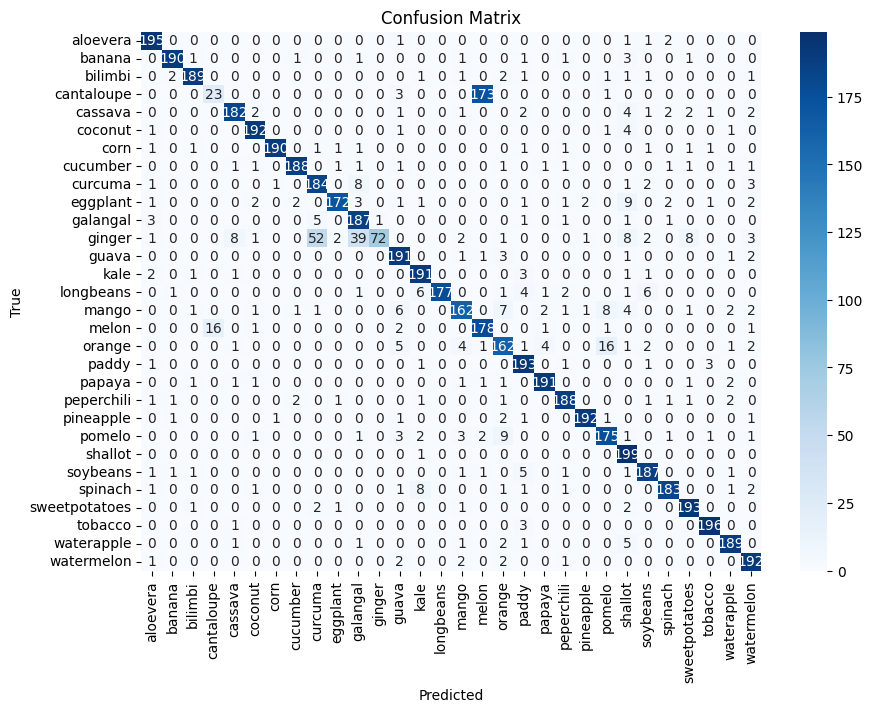

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels (y_true)
y_true = test_generator.classes

# Step 1: Get the number of test samples
num_samples = len(y_true)

# Step 2: Predict on the test set (you can pass steps=None to predict on all batches)
y_pred = model.predict(test_generator, steps=int(np.ceil(num_samples / test_generator.batch_size)), verbose=1)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


               precision    recall  f1-score   support

     aloevera       1.00      0.98      0.99       200
       banana       0.99      1.00      0.99       200
      bilimbi       0.99      0.99      0.99       200
   cantaloupe       0.51      0.83      0.63       200
      cassava       0.98      0.98      0.98       200
      coconut       0.99      0.99      0.99       200
         corn       0.98      0.98      0.98       200
     cucumber       0.98      0.98      0.98       200
      curcuma       0.95      0.97      0.96       200
     eggplant       0.98      0.98      0.98       200
     galangal       0.98      0.98      0.98       200
       ginger       0.97      0.97      0.97       200
        guava       0.98      0.98      0.98       200
         kale       0.97      0.98      0.98       200
    longbeans       0.98      0.98      0.98       200
        mango       0.98      0.97      0.98       200
        melon       0.57      0.22      0.32       200
       or

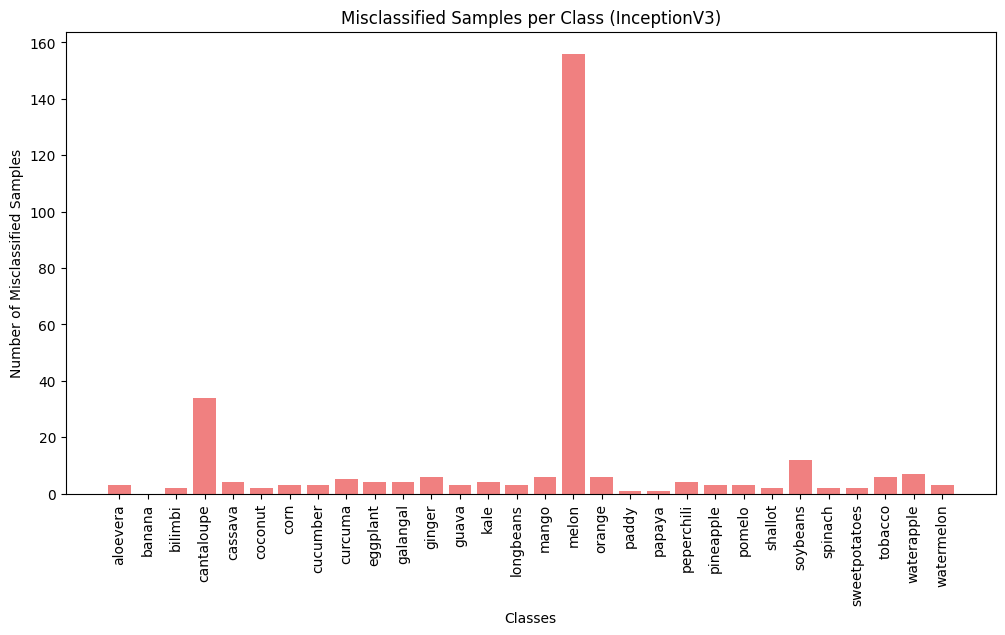

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Get the misclassified labels for each class
misclassified_labels = []

for i in range(len(y_true)):
    if y_true[i] != y_pred_classes[i]:
        misclassified_labels.append(y_true[i])  # Append the true class of the misclassified image

# Count misclassified samples for each class
misclassified_count = Counter(misclassified_labels)

# Sort the misclassified counts by class name for a better visualization
misclassified_count_sorted = dict(sorted(misclassified_count.items()))

# Get the class names (sorted for consistency)
class_names = list(test_generator.class_indices.keys())
misclassified_values = [misclassified_count_sorted.get(i, 0) for i in range(len(class_names))]

# Plot the bar graph for misclassified samples per class
plt.figure(figsize=(12, 6))
plt.bar(class_names, misclassified_values, color='lightcoral')
plt.xlabel('Classes')
plt.ylabel('Number of Misclassified Samples')
plt.title('Misclassified Samples per Class (InceptionV3)')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.show()


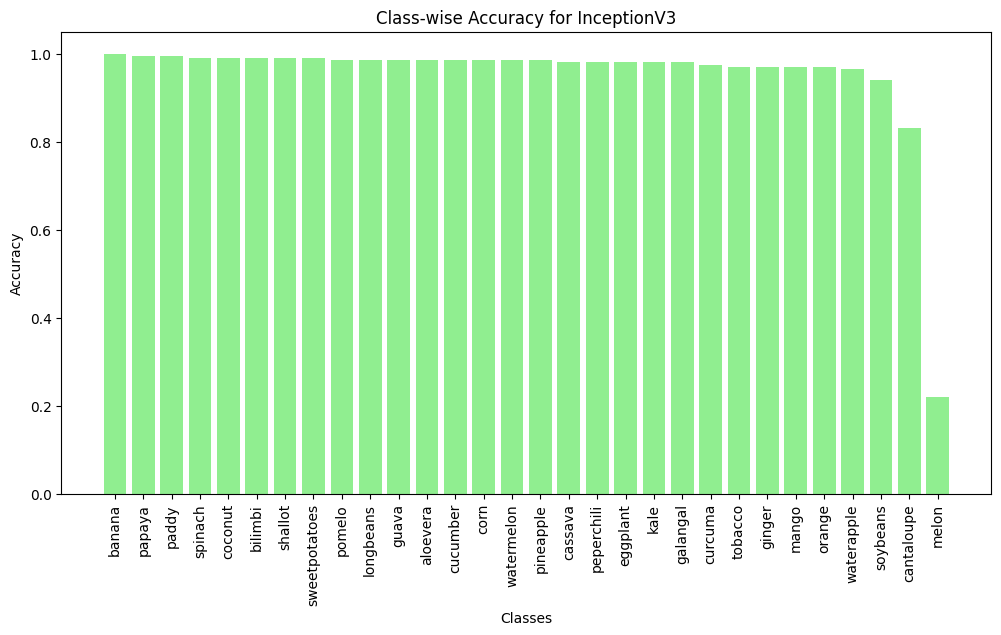

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get the class names (sorted for consistency)
class_names = list(test_generator.class_indices.keys())

# Calculate class-wise accuracy
class_accuracy = {}
for i in range(len(class_names)):
    correct_preds = np.sum((y_true == i) & (y_pred_classes == i))
    total_class_samples = np.sum(y_true == i)
    class_accuracy[class_names[i]] = correct_preds / total_class_samples if total_class_samples > 0 else 0

# Create a DataFrame for class-wise accuracy
class_accuracy_df = pd.DataFrame(list(class_accuracy.items()), columns=['Class', 'Accuracy'])

# Sort the DataFrame by accuracy (descending order for better visualization)
class_accuracy_df = class_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plotting class-wise accuracy as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_accuracy_df['Class'], class_accuracy_df['Accuracy'], color='lightgreen')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy for InceptionV3')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()
